In [5]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [7]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

In [9]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,6
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,1
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,0
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,4
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,6


In [10]:
X = df.drop(columns=['NObeyesdad', 'id'])
y = df['NObeyesdad']

In [11]:
y.unique()

array([6, 1, 0, 4, 3, 5, 2])

In [12]:
X_encoded = pd.get_dummies(X, columns=['Gender','family_history_with_overweight', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'FAVC'], dtype=int)

In [13]:
X_encoded.tail()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,FAVC_no,FAVC_yes
20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680,0,1,...,0,1,0,0,0,0,1,0,0,1
20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000,0,1,...,0,1,0,0,0,0,1,0,0,1
20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439,0,1,...,0,0,1,0,0,0,1,0,0,1
20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834,0,1,...,0,0,1,1,0,0,0,0,0,1
20757,26.680376,1.816547,118.134898,3.000000,3.000000,2.003563,0.684487,0.713823,0,1,...,0,1,0,0,0,0,1,0,0,1


In [14]:
columns_to_scale = ['Age', 'Height', 'Weight']

ct = ColumnTransformer([('scaler', StandardScaler(), columns_to_scale)], remainder='passthrough')

X_scaled = ct.fit_transform(X_encoded)
# X_scaled.tail()

In [15]:
pd.DataFrame(X_scaled, columns=X_encoded.columns).head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,FAVC_no,FAVC_yes
0,0.105699,-0.002828,-0.235713,2.000000,2.983297,2.763573,0.000000,0.976473,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-1.027052,-1.606291,-1.170931,2.000000,3.000000,2.000000,1.000000,1.000000,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.027052,0.128451,-1.430012,1.880534,1.411685,1.910378,0.866045,1.673584,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.507929,0.120090,1.644770,3.000000,3.000000,1.674061,1.467863,0.780199,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.371197,2.450367,0.224054,2.679664,1.971472,1.979848,1.967973,0.931721,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape[1]

30

In [15]:
num_classes = 7
input_shape_ = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=input_shape_),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.build(input_shape=input_shape_)

In [16]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 7)                 119       
                                                                 
Total params: 4,711
Trainable params: 4,711
Non-trainable params: 0
_________________________________________________________________


In [18]:
EPOCHS=100

history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
519/519 [==============================] - 2s 3ms/step - loss: 0.8287 - accuracy: 0.6896 - val_loss: 0.4698 - val_accuracy: 0.8382
Epoch 2/100
519/519 [==============================] - 1s 2ms/step - loss: 0.4344 - accuracy: 0.8482 - val_loss: 0.3921 - val_accuracy: 0.8591
Epoch 3/100
519/519 [==============================] - 1s 2ms/step - loss: 0.4034 - accuracy: 0.8572 - val_loss: 0.3993 - val_accuracy: 0.8651
Epoch 4/100
519/519 [==============================] - 1s 3ms/step - loss: 0.3941 - accuracy: 0.8610 - val_loss: 0.3759 - val_accuracy: 0.8663
Epoch 5/100
519/519 [==============================] - 1s 3ms/step - loss: 0.3849 - accuracy: 0.8650 - val_loss: 0.3637 - val_accuracy: 0.8784
Epoch 6/100
519/519 [==============================] - 1s 2ms/step - loss: 0.3808 - accuracy: 0.8667 - val_loss: 0.3739 - val_accuracy: 0.8709
Epoch 7/100
519/519 [==============================] - 1s 2ms/step - loss: 0.3677 - accuracy: 0.8717 - val_loss: 0.3608 - val_accuracy: 0.8704

Epoch 58/100
519/519 [==============================] - 1s 2ms/step - loss: 0.2843 - accuracy: 0.8993 - val_loss: 0.3547 - val_accuracy: 0.8786
Epoch 59/100
519/519 [==============================] - 1s 3ms/step - loss: 0.2884 - accuracy: 0.8970 - val_loss: 0.3581 - val_accuracy: 0.8793
Epoch 60/100
519/519 [==============================] - 1s 3ms/step - loss: 0.2829 - accuracy: 0.8994 - val_loss: 0.3549 - val_accuracy: 0.8755
Epoch 61/100
519/519 [==============================] - 2s 3ms/step - loss: 0.2814 - accuracy: 0.9001 - val_loss: 0.3789 - val_accuracy: 0.8661
Epoch 62/100
519/519 [==============================] - 1s 3ms/step - loss: 0.2830 - accuracy: 0.8970 - val_loss: 0.3932 - val_accuracy: 0.8598
Epoch 63/100
519/519 [==============================] - 1s 3ms/step - loss: 0.2835 - accuracy: 0.8970 - val_loss: 0.3546 - val_accuracy: 0.8791
Epoch 64/100
519/519 [==============================] - 1s 2ms/step - loss: 0.2799 - accuracy: 0.9008 - val_loss: 0.3525 - val_accuracy:

In [19]:
model.evaluate(X_test, y_test)

130/130 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.8707


[0.37827783823013306, 0.8706647157669067]

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

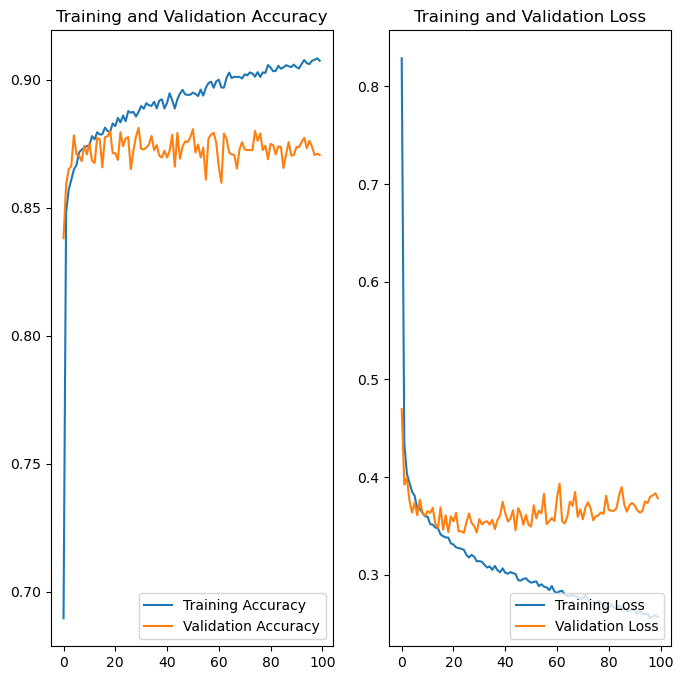

In [21]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")


plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

# Decision Tree Classifier

In [1]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtc = DecisionTreeClassifier(max_depth=15)

In [38]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15)

In [39]:
acc_train = dtc.score(X_train, y_train)
acc_train

0.9748885944839215

In [40]:
acc_train = dtc.score(X_test, y_test)
acc_train

0.8571772639691715

In [32]:
from sklearn.metrics import confusion_matrix
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: ")
print(cm)

Confusion matrix: 
[[464  54   2   0   0   2   2]
 [ 54 483   0   0   0  76  13]
 [  2   2 446  18   3  24  48]
 [  1   0  19 631   1   0   5]
 [  0   0   2   1 801   0   0]
 [  1  57  14   1   0 324  87]
 [  2  10  48   7   0  75 372]]
